#  1.0 Import Dependencies

In [3]:
import pandas as pd

In [5]:


# File path
file_path = 'academic_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())



  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

In [203]:
target_var = ['Class']

num_variables = ['raisedhands'
                 ,'VisITedResources'
                 ,'AnnouncementsView'
                 ]

binary_var = ['gender'
              ,'Relation'
              ,'ParentAnsweringSurvey'
              ,'ParentschoolSatisfaction'
              ,'StudentAbsenceDays'
              ]


# 3.0 Pre process the data 



In [204]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Convert binary variables
binary_mappings = {
    'Yes': 1, 'No': 0,
    'Good': 1, 'Bad': 0,
    'M' : 1 , 'F':0,
    'First': 1 , 'Second':0,
    'Mum' :1 , 'Father':0,
    'Under-7':1 , 'Above-7':0,
    'Good':1 , 'Bad':0,
    

}

binary_columns = binary_var
for col in binary_columns:
    df[col] = df[col].map(binary_mappings)



In [205]:
# Normalize continuous variables
continuous_vars = num_variables
scaler = MinMaxScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [206]:
df = df[target_var+num_variables+binary_var]
df

,Class,raisedhands,VisITedResources,AnnouncementsView,gender,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,0.15,0.161616,0.020408,1,0,1,1,1
1,M,0.20,0.202020,0.030612,1,0,1,1,1
2,L,0.10,0.070707,0.000000,1,0,0,0,0
3,L,0.30,0.252525,0.051020,1,0,0,0,0
4,M,0.40,0.505051,0.122449,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
475,L,0.05,0.040404,0.051020,0,0,0,0,0
476,M,0.50,0.777778,0.142857,0,0,0,0,1
477,M,0.55,0.747475,0.255102,0,0,0,0,1
478,L,0.30,0.171717,0.142857,0,0,0,0,0


In [207]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
encoded_target = encoder.fit_transform(df[['Class']])

In [208]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your preprocessed feature matrix and 'y' is the one-hot encoded target
X = df.drop(columns=['Class'])  # Replace 'target_var' with your target variable
y = encoded_target  # One-hot encoded target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [248]:
X_train.shape[1]

8

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import  Dropout

# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer with 8 neurons
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dropout(0.1))  # Drop 10% of the neurons in the hidden layer


# Add output layer with 3 neurons (one for each class) and softmax activation
model.add(Dense(3, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])



In [210]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


12/12 [==============================] - 1s 25ms/step - loss: 1.0870 - accuracy: 0.3203 - val_loss: 0.9756 - val_accuracy: 0.5521
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9229 - accuracy: 0.5339 - val_loss: 0.8709 - val_accuracy: 0.5417
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8294 - accuracy: 0.5964 - val_loss: 0.7587 - val_accuracy: 0.7396
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7471 - accuracy: 0.6901 - val_loss: 0.6921 - val_accuracy: 0.7708
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7180 - accuracy: 0.6615 - val_loss: 0.6380 - val_accuracy: 0.7812
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 0.6815 - accuracy: 0.6693 - val_loss: 0.5933 - val_accuracy: 0.7812
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6430 - accuracy: 0.7344 - val_loss: 0.5620 - val_accuracy: 0.7708
Epoch 8/100
12/12 [===

In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))  # Hidden layer with L2 regularization
# model.add(Dropout(0.2))  # Drop 30% of neurons
# model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))  # Another hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/1000
6/6 [==============================] - 1s 57ms/step - loss: 1.0226 - accuracy: 0.4583 - val_loss: 1.0345 - val_accuracy: 0.3958 - lr: 0.0010
Epoch 2/1000
6/6 [==============================] - 0s 32ms/step - loss: 1.0120 - accuracy: 0.4609 - val_loss: 1.0216 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 3/1000
6/6 [==============================] - 0s 17ms/step - loss: 1.0019 - accuracy: 0.4766 - val_loss: 1.0103 - val_accuracy: 0.4479 - lr: 0.0010
Epoch 4/1000
6/6 [==============================] - 0s 27ms/step - loss: 0.9924 - accuracy: 0.4818 - val_loss: 1.0002 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 5/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.9842 - accuracy: 0.4896 - val_loss: 0.9901 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 6/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.9758 - accuracy: 0.4896 - val_loss: 0.9810 - val_accuracy: 0.4479 - lr: 0.0010
Epoch 7/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.9

In [244]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


3/3 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.8333
Test Accuracy: 83.33%


In [237]:
# Make predictions on new data (e.g., X_test)
predictions = model.predict(X_test)

# Convert predictions from one-hot encoded form to class labels (H, M, L)
predicted_classes = encoder.inverse_transform(predictions)

3/3 [==============================] - 0s 5ms/step


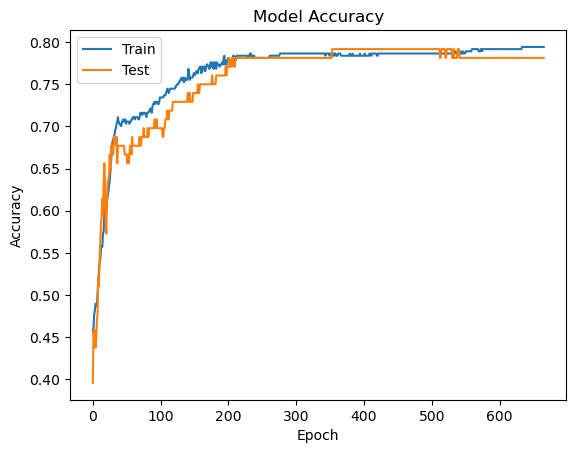

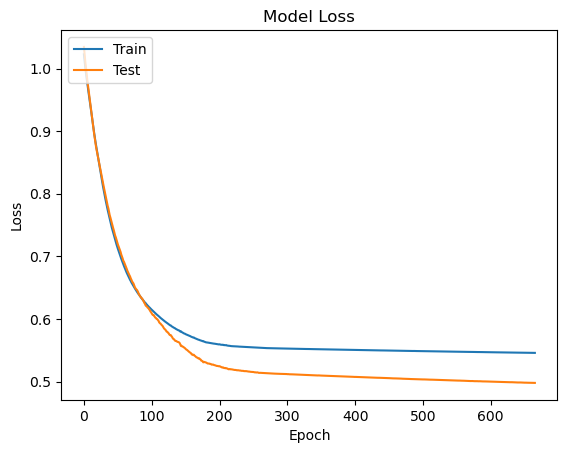

In [246]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
